# Линейная алгебра, математический анализ

1. Линейная алгебра

In [ ]:
# 1.
import numpy as np

A = np.array([[2, -4], [3, 5], [-1, 0]])
B = np.array([[1, 2, 7], [-3, -4, 0], [5, 2, 1]])
C = np.array([[6, -3, 9], [4, -5, 2], [8, 1, 5]])

# Формула D = A.T @ C - 2 * (A.T @ B.T)
D = A.T @ C - 2 * (A.T @ B.T)

print("Матрица D:")
print(D)

Матрица D:
[[ 14  14 -11]
 [-16   3  -6]]


In [ ]:
# 2.
from sympy import symbols, Matrix, solve

# 1. Определяем символьные переменные
x, y, z, v = symbols('x y z v')

# 2. Описываем матрицы из условия
# Матрица 1 (с x и y)
m1 = Matrix([
    [x,  2, 3],
    [-1, y, 4]
])

# Матрица 2 (с z)
m2 = Matrix([
    [1,  2, -5],
    [2, -6, z]
])

# Матрица результата (с v)
m_res = Matrix([
    [8, v, -1],
    [1, 6, 4]
])

# 3. Составляем уравнение: 3*m1 + 2*m2 = m_res
equation = 3 * m1 + 2 * m2 - m_res

# 4. Решаем систему уравнений (SymPy сравнит каждый элемент матрицы с нулем)
solution = solve(equation, (x, y, z, v))

print("Результаты вычислений:")
for var, val in solution.items():
    print(f"{var} = {val}")

Результаты вычислений:
v = 10
x = 2
y = 6
z = -4


In [3]:
# 3.
from sympy import symbols, Matrix

# 1. Объявляем параметры p и q как символы
p, q = symbols('p q')

# 2. Создаем матрицу
A = Matrix([
    [1, 2, 3],
    [3, 6, p],
    [5, 10, q]
])

# 3. Приводим матрицу к ступенчатому виду (rref)
A_rref, pivots = A.rref()

print("Матрица после приведения к ступенчатому виду:")
print(A_rref)

# Чтобы ранг был 1, элементы в позициях (2,3) и (3,3) должны быть равны 0


Матрица после приведения к ступенчатому виду:
Matrix([[1, 2, 0], [0, 0, 1], [0, 0, 0]])


In [4]:
# 4.

from sympy import Matrix

# 1. Задаем векторы (как столбцы)
a1 = Matrix([2, -5])
a2 = Matrix([-1, 3])
x = Matrix([1, -4])

# 2. Создаем матрицу перехода (базис B)
B = Matrix.hstack(a1, a2)

# Проверка на линейную независимость (определитель не должен быть 0)
det_B = B.det()
print(f"Определитель матрицы B: {det_B}")
if det_B != 0:
    print("Векторы линейно независимы. Они образуют базис.\n")

# --- Пункт (a) ---
# Ищем [x]B. Решаем уравнение B * [x]B = x
# Это то же самое что [x]B = B.inv() * x
x_B = B.LUsolve(x) 
print("Пункт (a): Координаты вектора x в базисе B:")
print(x_B)

# --- Пункт (b) ---
# Дано [y]B = (1, 1). Находим y в стандартном базисе.
# y = B * [y]B
y_B = Matrix([1, 1])
y_std = B * y_B
print("\nПункт (b): Координаты вектора y в стандартном базисе:")
print(y_std)

Определитель матрицы B: 1
Векторы линейно независимы. Они образуют базис.

Пункт (a): Координаты вектора x в базисе B:
Matrix([[-1], [-3]])

Пункт (b): Координаты вектора y в стандартном базисе:
Matrix([[1], [-2]])


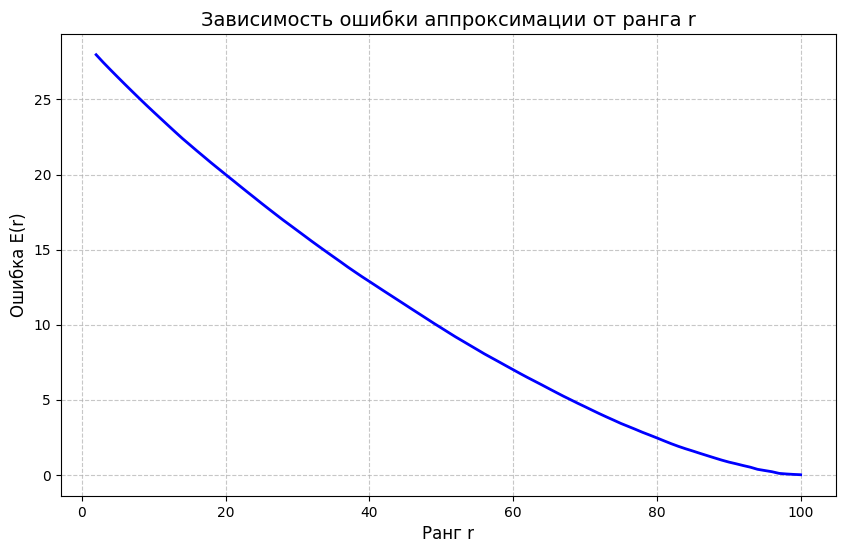

In [5]:
# 5.
import numpy as np
import matplotlib.pyplot as plt

# 1. Генерируем случайную квадратную матрицу n x n (пусть n = 100)
n = 100
A = np.random.rand(n, n)

# 2. Выполняем SVD разложение
# U — левые сингулярные векторы
# s — сингулярные числа (numpy возвращает их списком от большего к меньшему)
# Vt — правые сингулярные векторы (транспонированные)
U, s, Vt = np.linalg.svd(A)

errors = []
ranks = range(2, n + 1)

for r in ranks:
    # 3. Делаем аппроксимацию ранга r
    # Берем первые r столбцов U, первые r чисел s и первые r строк Vt
    U_r = U[:, :r]
    s_r = np.diag(s[:r]) # превращаем список чисел в диагональную матрицу
    Vt_r = Vt[:r, :]
    
    # Восстанавливаем матрицу с пониженным рангом
    A_approx = U_r @ s_r @ Vt_r
    
    # 4. Считаем ошибку (Норма Фробениуса разности матриц)
    # Это корень из суммы квадратов разностей всех элементов
    error = np.linalg.norm(A - A_approx, ord='fro')
    errors.append(error)

# 5. Строим график
plt.figure(figsize=(10, 6))
plt.plot(ranks, errors, color='blue', linewidth=2)
plt.title('Зависимость ошибки аппроксимации от ранга r', fontsize=14)
plt.xlabel('Ранг r', fontsize=12)
plt.ylabel('Ошибка E(r)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Начало математического анализа и оптимизации

In [6]:
# 1.
from sympy import symbols, diff, solve

# 1. Определяем переменные
x1, x2 = symbols('x1 x2')

# 2. Описываем функцию
f = x1**3 - 2*x1*x2 + x2**2 - 3*x1 - 2*x2

# 3. Считаем частные производные (компоненты градиента)
df_dx1 = diff(f, x1)
df_dx2 = diff(f, x2)

print(f"Градиент функции f:")
print(f"df/dx1 = {df_dx1}")
print(f"df/dx2 = {df_dx2}")

# 4. Находим критические точки (решаем систему уравнений df/dx1 = 0 и df/dx2 = 0)
critical_points = solve([df_dx1, df_dx2], (x1, x2))

print("\nКритические точки (x1, x2):")
print(critical_points)

Градиент функции f:
df/dx1 = 3*x1**2 - 2*x2 - 3
df/dx2 = -2*x1 + 2*x2 - 2

Критические точки (x1, x2):
[(-1, 0), (5/3, 8/3)]


In [7]:
# 2.
from sympy import symbols, ln, sqrt, diff, simplify

# 1. Определяем переменные
x1, x2 = symbols('x1 x2')

# 2. Описываем функцию
f = ln(sqrt(x1) + sqrt(x2))

# 3. Считаем частные производные
df_dx1 = diff(f, x1)
df_dx2 = diff(f, x2)

# 4. Составляем левую часть уравнения: x1 * df/dx1 + x2 * df/dx2
lhs = x1 * df_dx1 + x2 * df_dx2

# 5. Упрощаем выражение
result = simplify(lhs)

print(f"Частная производная по x1: {df_dx1}")
print(f"Частная производная по x2: {df_dx2}")
print(f"Результат выражения x1*(df/dx1) + x2*(df/dx2) = {result}")

Частная производная по x1: 1/(2*sqrt(x1)*(sqrt(x1) + sqrt(x2)))
Частная производная по x2: 1/(2*sqrt(x2)*(sqrt(x1) + sqrt(x2)))
Результат выражения x1*(df/dx1) + x2*(df/dx2) = 1/2


In [8]:
# 3.
from sympy import symbols, Matrix

# 1. Определяем переменные
x, y, z = symbols('x y z')

# 2. Описываем функции f1 и f2
f1 = x + y + z
f2 = x * y * z

# Создаем вектор-функцию F
F = Matrix([f1, f2])

# 3. Находим матрицу Якоби относительно переменных (x, y, z)
jacobian_matrix = F.jacobian([x, y, z])

print("Матрица Якоби в общем виде:")
print(jacobian_matrix)

# 4. Находим численное значение в точке v = (1, 2, 3)
point = {x: 1, y: 2, z: 3}
numerical_jacobian = jacobian_matrix.subs(point)

print("\nМатрица Якоби в точке (1, 2, 3):")
print(numerical_jacobian)

Матрица Якоби в общем виде:
Matrix([[1, 1, 1], [y*z, x*z, x*y]])

Матрица Якоби в точке (1, 2, 3):
Matrix([[1, 1, 1], [6, 3, 2]])


In [ ]:
# 4.
# Проверка на Python (SymPy) для n = 3

# Мы не можем в SymPy легко задать «вектор произвольной длины n», но мы можем проверить формулу для n = 3, чтобы убедиться в закономерности.

from sympy import symbols, sqrt, diff, Matrix, Rational, simplify

# 1. Задаем вектор x из 3-х компонент
x1, x2, x3 = symbols('x1 x2 x3')
x = Matrix([x1, x2, x3])

# 2. Считаем норму
norm_x = sqrt(x1**2 + x2**2 + x3**2)

# Используем Rational(1, 3), чтобы избежать появления "1.0" из-за float
f = Rational(1, 3) * norm_x**3

# 3. Считаем градиент (производные по каждой компоненте)
grad_f = Matrix([diff(f, x1), diff(f, x2), diff(f, x3)])

print("Градиент функции f (покомпонентно):")
# simplify уберет лишние множители и приведет к чистому виду
print(simplify(grad_f))

# 4. Наша теоретическая формула: ||x|| * x
formula_grad = norm_x * x

print("\nРезультат по формуле ||x|| * x:")
print(simplify(formula_grad))

# 5. Проверка на равенство

is_equal = simplify(grad_f) == simplify(formula_grad)
print(f"\nСовпадают ли результаты? {is_equal}")

Градиент функции f (покомпонентно):
Matrix([[x1*sqrt(x1**2 + x2**2 + x3**2)], [x2*sqrt(x1**2 + x2**2 + x3**2)], [x3*sqrt(x1**2 + x2**2 + x3**2)]])

Результат по формуле ||x|| * x:
Matrix([[x1*sqrt(x1**2 + x2**2 + x3**2)], [x2*sqrt(x1**2 + x2**2 + x3**2)], [x3*sqrt(x1**2 + x2**2 + x3**2)]])

Совпадают ли результаты? True


In [13]:
# 5.
from sympy import symbols, sqrt, diff, Matrix, simplify

# 1. Задаем вектор x
x1, x2, x3 = symbols('x1 x2 x3')
x = Matrix([x1, x2, x3])

# 2. Функция f — это евклидова норма
f = sqrt(x1**2 + x2**2 + x3**2)

# 3. Считаем градиент
grad_f = Matrix([diff(f, x1), diff(f, x2), diff(f, x3)])

print("Градиент Евклидовой нормы:")
print(simplify(grad_f))

# 4. Проверяем формулу x / ||x||
norm_x = sqrt(x1**2 + x2**2 + x3**2)
formula_grad = x / norm_x

print("\nРезультат по формуле x / ||x||:")
print(simplify(formula_grad))

# Проверка
print("\nСовпадают?", simplify(grad_f) == simplify(formula_grad))

Градиент Евклидовой нормы:
Matrix([[x1/sqrt(x1**2 + x2**2 + x3**2)], [x2/sqrt(x1**2 + x2**2 + x3**2)], [x3/sqrt(x1**2 + x2**2 + x3**2)]])

Результат по формуле x / ||x||:
Matrix([[x1/sqrt(x1**2 + x2**2 + x3**2)], [x2/sqrt(x1**2 + x2**2 + x3**2)], [x3/sqrt(x1**2 + x2**2 + x3**2)]])

Совпадают? True


In [15]:
# 6.
# Проверим для матрицы A размером 2×2 и вектора x из 2-х элементов.
from sympy import symbols, Matrix, sqrt, diff, simplify

# 1. Задаем переменные и матрицу A
x1, x2 = symbols('x1 x2')
x = Matrix([x1, x2])

a11, a12, a21, a22 = symbols('a11 a12 a21 a22')
A = Matrix([[a11, a12], [a21, a22]])

# 2. Вычисляем Ax и его норму
Ax = A * x
f = sqrt(Ax[0]**2 + Ax[1]**2)

# 3. Считаем градиент через производные
grad_f = Matrix([diff(f, x1), diff(f, x2)])

print("Градиент, вычисленный покомпонентно:")
print(simplify(grad_f))

# 4. Проверяем нашу формулу (A^T * A * x) / ||Ax||
norm_Ax = f
formula_grad = (A.T * A * x) / norm_Ax

print("\nРезультат по формуле (A.T * A * x) / ||Ax||:")
print(simplify(formula_grad))

# Проверка
diff_matrix = simplify(grad_f - formula_grad)
print("\nРазница между формулами равна нулю?", diff_matrix == Matrix([0, 0]))

Градиент, вычисленный покомпонентно:
Matrix([[(a11*(a11*x1 + a12*x2) + a21*(a21*x1 + a22*x2))/sqrt((a11*x1 + a12*x2)**2 + (a21*x1 + a22*x2)**2)], [(a12*(a11*x1 + a12*x2) + a22*(a21*x1 + a22*x2))/sqrt((a11*x1 + a12*x2)**2 + (a21*x1 + a22*x2)**2)]])

Результат по формуле (A.T * A * x) / ||Ax||:
Matrix([[(x1*(a11**2 + a21**2) + x2*(a11*a12 + a21*a22))/sqrt((a11*x1 + a12*x2)**2 + (a21*x1 + a22*x2)**2)], [(x1*(a11*a12 + a21*a22) + x2*(a12**2 + a22**2))/sqrt((a11*x1 + a12*x2)**2 + (a21*x1 + a22*x2)**2)]])

Разница между формулами равна нулю? True


In [16]:
# 7.
# Проверим для n=2
from sympy import symbols, exp, diff, Matrix, simplify

# 1. Задаем переменные
x1, x2 = symbols('x1 x2')
x = Matrix([x1, x2])

# 2. Функция f = -exp(-x_transpose * x)
f = -exp(-(x1**2 + x2**2))

# 3. Считаем градиент покомпонентно
grad_f = Matrix([diff(f, x1), diff(f, x2)])

print("Градиент, вычисленный покомпонентно:")
print(simplify(grad_f))

# 4. Проверяем нашу формулу 2 * exp(-x.T * x) * x
formula_grad = 2 * exp(-(x1**2 + x2**2)) * x

print("\nРезультат по формуле 2 * e^(-x.T*x) * x:")
print(simplify(formula_grad))

# Проверка
print("\nСовпадают?", simplify(grad_f) == simplify(formula_grad))

Градиент, вычисленный покомпонентно:
Matrix([[2*x1*exp(-x1**2 - x2**2)], [2*x2*exp(-x1**2 - x2**2)]])

Результат по формуле 2 * e^(-x.T*x) * x:
Matrix([[2*x1*exp(-x1**2 - x2**2)], [2*x2*exp(-x1**2 - x2**2)]])

Совпадают? True
